In [5]:
# import required packages-

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnt
import matplotlib.patches as patches

In [6]:
# Set input paramaters such as titles, colours and squad file.abs

team_name = "Aberdeen"

season_start = 2025

squadfile = 'aberdeen.csv'

colours = {
    "cl_background":"#000000",
    "cl_foreground":"#FFFFFF",
    "cl_secondary":"#999999",
    "cl_alt_1":"#d61f34",
    "cl_alt_2":"#3A86FF",
    "cl_alt_3":"#FFBE0B",
    "cl_alt_4":"#3EC300",
    "cl_alt_5":"#595959"}


title = "Squad age distribution for " + team_name + " season starting " + str(season_start) 
subtitle = "On basis of current date: " + datetime.datetime.now().strftime("%d/%m/%Y") 

# Set Fonts
title_font = fnt.FontProperties(family="P052")
body_font = fnt.FontProperties(family="URW Gothic")

In [7]:
def calculate_age(born, season_start):
    start_date = datetime.datetime(season_start, 8,1)
    cutpoint = ((start_date.month > born.dt.month) & (start_date.day > born.dt.day))
    age = start_date.year - born.dt.year 
    age[cutpoint] = age -1
    return age

In [8]:
# read in and dispaly header of csv files to check.
squad = pd.read_csv(squadfile)
squad["Date of Birth"] = pd.to_datetime(squad["Date of Birth"], dayfirst=True)
squad["Age"] = calculate_age(squad["Date of Birth"],season_start)
squad["Years Remaining"] = squad["Contract Expiry"] - season_start
squad["Initial"] = squad["First Name"].str[0]

squad.head()


,First Name,Last Name,Date of Birth,Position,Contract Expiry,Status,Age,Years Remaining,Initial
0,Dimitar,Mitov,1997-01-22,GK,2027,N,28,2,D
1,Kristers,Tobers,2000-12-13,RCB,2028,N,25,3,K
2,Mats,Knoester,1998-11-19,LCB,2029,N,27,4,M
3,Gavin,Molloy,2001-10-19,LCB,2027,N,24,2,G
4,Jack,Milne,2003-02-10,RCB,2029,N,22,4,J


In [9]:
formation = pd.read_csv("formation.csv") 
sorting_key = {value: key for key, value in formation["name"].to_dict().items()}
sorted_squad = squad.sort_values(by=["Position"], key=lambda x: x.map(sorting_key)).reset_index(drop=True)

findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic' not found.
findfont: Font family 'URW Gothic'

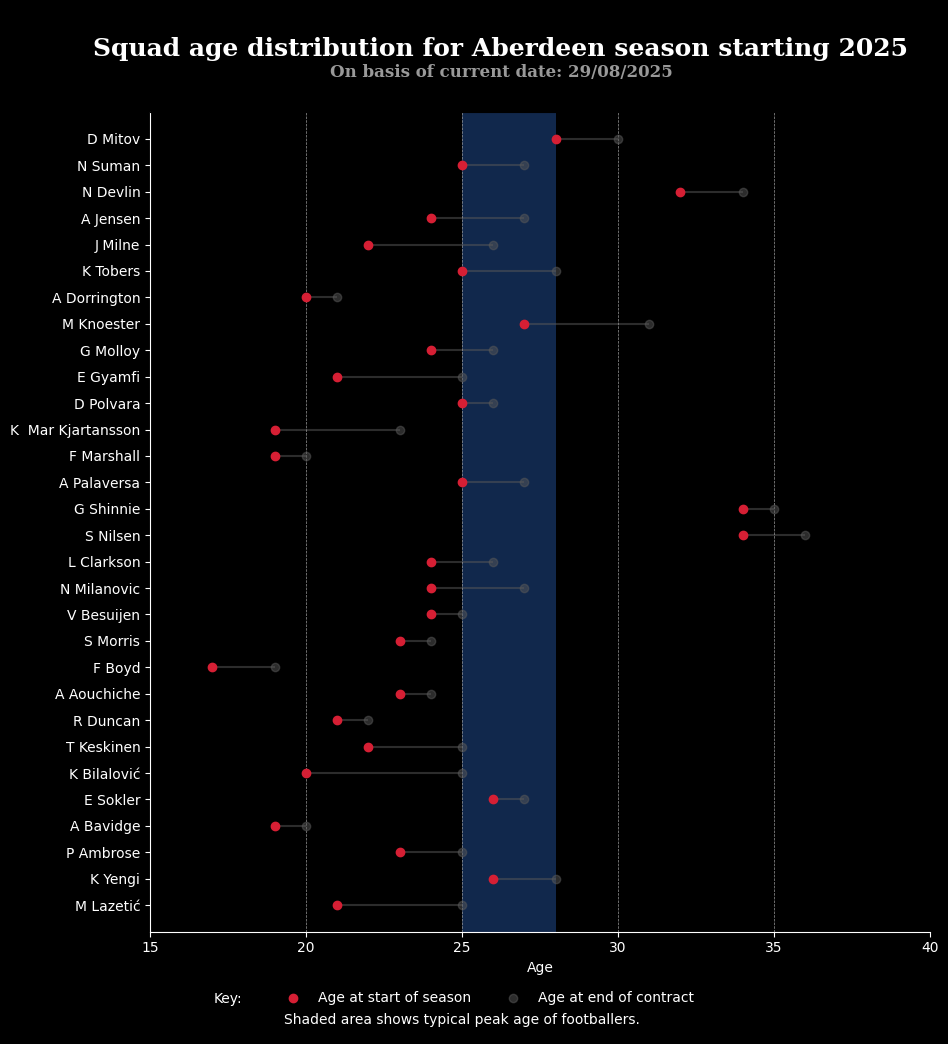

In [10]:
fig = plt.figure(figsize=(780/100,1024/100))
fig.patch.set_facecolor(colours["cl_background"])

# Add axis for header section, key and pitch
ax1 = fig.add_axes([0, 0.9, 1, .1], facecolor=colours["cl_background"])
ax2 = fig.add_axes([0.1, 0.1, 1, .8], facecolor=colours["cl_background"])
ax3 = fig.add_axes([0, 0, 1, .1], facecolor=colours["cl_background"])

ax1.axis(False)
ax3.axis(False)

# Place header and subheader 
ax1.text(
    x=0.55, 
    y=.55, 
    s=title, 
    fontsize=18, 
    fontproperties=title_font,
    family='serif', 
    fontweight='bold', 
    color=colours["cl_foreground"], 
    ha='center'
)

ax1.text(
    x=0.55, 
    y=.35, 
    s=subtitle, 
    fontsize=12, 
    fontproperties=title_font,
    family='serif', 
    fontweight='bold', 
    color=colours["cl_secondary"], 
    ha='center'
)


# Plays the key/legend

ax3.text(
    x=0.2, 
    y=.3, 
    s='Key:', 
    fontsize=10, 
    fontproperties=body_font,  
    color=colours["cl_foreground"], 
    ha='center'
)

ax3.text(
    x=0.5, 
    y=.1, 
    s='Shaded area shows typical peak age of footballers.', 
    fontsize=10, 
    fontproperties=body_font,  
    color=colours["cl_foreground"], 
    ha='center'
)


## Plot Ages

player_index=range(1,len(sorted_squad.index)+1)

# add shading showing peak ages 25-28

ax2.add_patch(patches.Rectangle((25, 0), 3, len(sorted_squad.index)+1, alpha=0.3, facecolor=colours["cl_alt_2"], linewidth=0, zorder=0))

# Plot line between age now and contract finish, plot age, and plot age at end of contract.

ax2.hlines(y=player_index, xmin=sorted_squad["Age"], xmax=(sorted_squad["Age"]+sorted_squad["Years Remaining"]), color=colours["cl_alt_5"], alpha=0.5, zorder=1)
ax2.scatter(sorted_squad["Age"], player_index, c=colours["cl_alt_1"], zorder=3, label="Age at start of season")
ax2.scatter((sorted_squad["Age"]+sorted_squad["Years Remaining"]), player_index, c=colours["cl_alt_5"], alpha=0.5, zorder=2, label="Age at end of contract")

# Sort axis by setting yticks to players name and x limits to show ages between 15 and 40
ax2.set_yticks(player_index)
ax2.set_yticklabels((sorted_squad["Initial"] + " " + sorted_squad["Last Name"]))
ax2.set_xlim(xmin=15,xmax=40)
ax2.set_ylim(ymin=len(sorted_squad.index)+1,ymax=0)

# Finalise formatting.
ax2.spines['bottom'].set_color(colours["cl_foreground"])
ax2.spines['left'].set_color(colours["cl_foreground"])
ax2.tick_params(axis='x', colors=colours["cl_foreground"])
ax2.tick_params(axis='y', colors=colours["cl_foreground"])
ax2.grid(axis = 'x', color = colours["cl_secondary"], linestyle = '--', linewidth = 0.5)
ax2.set_xlabel("Age",color=colours["cl_foreground"])
ax2.legend(ncols=2, bbox_to_anchor=(0.15, -0.105), loc='lower left', fontsize=10, prop=fnt.FontProperties(family="URW Gothic"), edgecolor=colours["cl_background"], facecolor=colours["cl_background"], labelcolor=colours["cl_foreground"])


fig.savefig((team_name + "_ages_" + str(season_start)+".png"), bbox_inches = 'tight')